<a href="https://colab.research.google.com/github/Demi-greaterme/Grade-Prediction-Model/blob/main/Grade_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pwd

/content


In [23]:
import pandas as pd
my_data = pd.read_csv("/content/Students_Grading_Dataset (1).csv")
my_data.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,92.29,F,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,93.55,F,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.03,A,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,90.91,A,13.3,Yes,No,Master's,Medium,6,4.5


In [24]:
# to see what features have missing values
print(my_data.isnull().sum())

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                   0
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                  0
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1025
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64


In [25]:
# dropping irrelevant features
my_data= my_data.drop(['Student_ID', 'First_Name', 'Last_Name', 'Email','Parent_Education_Level', 'Grade'], axis = 1)
my_data= my_data.drop(['Gender'], axis = 1)

In [29]:
print(my_data.columns)

Index(['Age', 'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night'],
      dtype='object')


In [27]:
print(my_data.dtypes == object)

Age                           False
Department                     True
Attendance (%)                False
Midterm_Score                 False
Final_Score                   False
Assignments_Avg               False
Quizzes_Avg                   False
Participation_Score           False
Projects_Score                False
Total_Score                   False
Study_Hours_per_Week          False
Extracurricular_Activities     True
Internet_Access_at_Home        True
Family_Income_Level            True
Stress_Level (1-10)           False
Sleep_Hours_per_Night         False
dtype: bool


In [28]:
print(my_data.isnull().sum(axis=1))
my_data[my_data.isnull().any(axis=1)]

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Length: 5000, dtype: int64


,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night


In [31]:
# encoding categorical variables
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categorical_columns = ['Department', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Family_Income_Level']

encoder = OneHotEncoder(sparse_output=False, handle_unknown= 'ignore')

encoded_features = encoder.fit_transform(my_data[categorical_columns])

encoded_col_names = encoder.get_feature_names_out(categorical_columns)

encoded_data = pd.DataFrame(encoded_features, columns=encoded_col_names, index = my_data.index)

df_numeric = my_data.drop(columns=categorical_columns)

my_data2 = pd.concat([df_numeric, encoded_data], axis=1)



In [35]:
# feature scaling to avoid bias during mutual information analysis
from sklearn.preprocessing import StandardScaler

needs_scaling = my_data2.drop('Total_Score', axis =  1)

scaler = StandardScaler()

scaled_features = scaler.fit_transform(needs_scaling)

scaled_features_df = pd.DataFrame(scaled_features, index=needs_scaling.index, columns=needs_scaling.columns)

my_data_scaled = pd.concat([scaled_features_df, my_data2['Total_Score']], axis=1)

In [39]:
my_data_scaled.head()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Study_Hours_per_Week,Stress_Level (1-10),...,Department_Engineering,Department_Mathematics,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Internet_Access_at_Home_No,Internet_Access_at_Home_Yes,Family_Income_Level_High,Family_Income_Level_Low,Family_Income_Level_Medium,Total_Score
0,0.478290,1.528977,-1.725991,-0.580837,-0.087922,-1.502261,0.808513,-0.821338,-1.004008,-1.561545,...,-0.584741,1.757358,-0.995211,0.995211,1.008032,-1.008032,-0.698321,-0.713587,1.409559,83.49
1,-1.532177,1.553297,-0.770419,0.260325,-0.050429,1.622045,1.312189,1.612474,1.331819,-0.522178,...,-0.584741,-0.569036,1.004812,-1.004812,1.008032,-1.008032,-0.698321,1.401371,-0.709442,92.29
2,1.483524,1.679067,-1.655441,-0.332990,0.756356,-1.722058,-1.561524,1.130388,-0.712029,1.210100,...,1.710160,-0.569036,-0.995211,0.995211,1.008032,-1.008032,-0.698321,1.401371,-0.709442,93.55
3,1.483524,1.043960,-1.436910,-1.467594,-0.476039,-0.593952,-1.578773,-1.327493,1.109359,0.863644,...,1.710160,-0.569036,1.004812,-1.004812,-0.992032,0.992032,-0.698321,1.401371,-0.709442,51.03
4,0.980907,-1.108038,-1.007878,-0.454575,-0.506589,0.633999,0.494578,0.869746,-0.586896,0.170733,...,-0.584741,-0.569036,-0.995211,0.995211,1.008032,-1.008032,-0.698321,-0.713587,1.409559,90.91


In [37]:
# some analysis to determine what feature aren't needed
from sklearn.feature_selection import mutual_info_regression

x = my_data_scaled.drop('Total_Score', axis = 1)

y = my_data_scaled['Total_Score']

scores = mutual_info_regression(x,y)

feature_scores = pd.Series(scores, index = x.columns)

feature_scores = feature_scores.sort_values(ascending = False)

print(feature_scores)

Sleep_Hours_per_Night             0.007040
Extracurricular_Activities_Yes    0.005028
Extracurricular_Activities_No     0.005019
Department_CS                     0.003593
Assignments_Avg                   0.003552
Family_Income_Level_High          0.002713
Department_Business               0.001853
Midterm_Score                     0.000737
Attendance (%)                    0.000506
Age                               0.000000
Quizzes_Avg                       0.000000
Final_Score                       0.000000
Stress_Level (1-10)               0.000000
Participation_Score               0.000000
Department_Engineering            0.000000
Projects_Score                    0.000000
Study_Hours_per_Week              0.000000
Department_Mathematics            0.000000
Internet_Access_at_Home_No        0.000000
Internet_Access_at_Home_Yes       0.000000
Family_Income_Level_Low           0.000000
Family_Income_Level_Medium        0.000000
dtype: float64


In [1]:
# sketchy scores. i'll visualize to assess weight balance
import matplotlib.pyplot as plt

plt.hist(my_data['Stress_Level (1-10)'], bins = 70)

plt.xlabel('Stress Levels (1-10)')

plt.ylabel('Frequency')

plt.title('Distribution of Stress Levels')

plt.show()


NameError: name 'my_data' is not defined

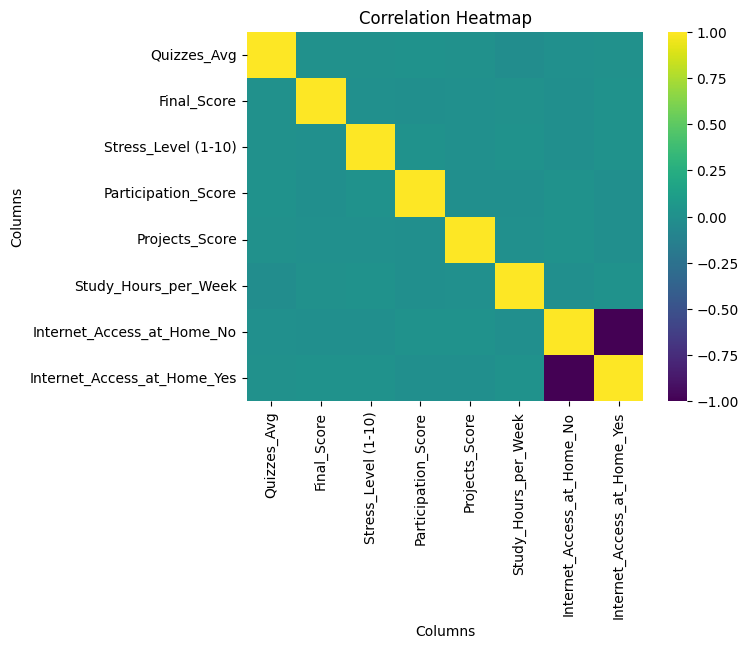

In [50]:
# still on visualization
import seaborn as sns

correlation = my_data2[['Quizzes_Avg', 'Final_Score', 'Stress_Level (1-10)', 'Participation_Score','Projects_Score', 'Study_Hours_per_Week', 'Internet_Access_at_Home_No', 'Internet_Access_at_Home_Yes']].corr()

sns.heatmap(correlation, cmap='viridis')

plt.xlabel('Columns')

plt.ylabel('Columns')

plt.title('Correlation Heatmap')

plt.show()

In [51]:
# dropping irrelevant features
my_data_scaled2 = my_data_scaled.drop(['Age','Quizzes_Avg', 'Final_Score', 'Stress_Level (1-10)', 'Participation_Score','Projects_Score', 'Study_Hours_per_Week', 'Internet_Access_at_Home_No', 'Internet_Access_at_Home_Yes','Department_Engineering', 'Department_Mathematics', 'Family_Income_Level_Low', 'Family_Income_Level_Medium', 'Department_CS', 'Department_Business'], axis =1)

In [58]:
# model training! 🙂
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# defining features
X = my_data_scaled2.drop('Total_Score', axis = 1)

y = my_data_scaled2['Total_Score']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 50)

model = keras.Sequential([
    layers.Dense(units = 128, activation = 'relu', input_shape = [7]),
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 1)
])

model.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics = ['mse']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
modelle = model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    epochs = 100,
    batch_size = 32,
    verbose = 0
)

In [60]:
results = model.evaluate(X_val, y_val)
print("MAE (Loss):", results[0])
print("MSE:", results[1])


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.7814 - mse: 230.4165
MAE (Loss): 12.859786987304688
MSE: 233.4018096923828


In [61]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
r2 = r2_score(y_val, y_pred)
print("R² Score:", r2)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R² Score: -0.14093882108373834
